In [1]:
#imports
import random

from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

from copy import deepcopy
from pprint import pprint

from nltk.sentiment import  SentimentIntensityAnalyzer

import os

# import spacy
# nlp = spacy.load("en_core_web_sm")

import matplotlib.image as mpimg




#ptwitterwordslemma plumber
#csv.preview
import pandas as pd
#import unicode character database
import unicodedata
#import regular expression operations
import re

#import natural language toolkit
import nltk
from nltk.corpus import words
#import our aquire


#import our stopwords list
from nltk.corpus import stopwords
from copy import deepcopy







from matplotlib_venn_wordcloud import venn3_wordcloud,venn2_wordcloud
from wordcloud import WordCloud,ImageColorGenerator
from matplotlib_venn import venn3, venn3_circles,venn2_circles,venn2,venn2_unweighted



In [2]:
# Read from the pickle and then display the unique file


# The remaining is explore


In [3]:

# twitterwordslemma['word_count'] = twitterwordslemma['lemmatized'].str.split(' ').apply(len)

# #Message_length feature:
# twitterwordslemma['message_length'] = twitterwordslemma['lemmatized'].str.len()

# #sentiment feature:
# s = SentimentIntensityAnalyzer()
# twitterwordslemma['sentiment'] = twitterwordslemma.lemmatized.apply(lambda doc: s.polarity_scores(doc)['compound'])

# new_list = []
# for spot in twitterwordslemma['type']:
#         if (spot == 'intj') | (spot == 'entj') | (spot == 'intp') | (spot == 'entp'):
#             new_list.append('analyst')
#         if (spot == 'infj') | (spot == 'enfj') | (spot == 'infp') | (spot == 'enfp'):
#             new_list.append('diplomat')
#         if (spot == 'istj') | (spot == 'estj') | (spot == 'isfj') | (spot == 'esfj'):
#             new_list.append('sentinel')
#         if (spot == 'istp') | (spot == 'estp') | (spot == 'isfp') | (spot == 'esfp'):
#             new_list.append('explorer')
#         # else:
#         #     new_list.append('other')
# twitterwordslemma['personality_domain'] = new_list



# twitterwordslemma['i_e'] = np.where(twitterwordslemma['type'].str[0] == 'i', 0, 1)
# twitterwordslemma['s_n'] = np.where(twitterwordslemma['type'].str[1] == 's', 0, 1)
# twitterwordslemma['f_t'] = np.where(twitterwordslemma['type'].str[2] == 'f', 0, 1)
# twitterwordslemma['p_j'] = np.where(twitterwordslemma['type'].str[3] == 'p', 0, 1)







In [4]:





from sklearn.model_selection import train_test_split

def wrangle():
    """This function is all encompassing to acquire and clean/prepare the data. there are 5 functions that are embedded inside this function that are used to return the 
    personality information in a DataFrame"""
    dataframe=pd.read_pickle("./fivezerominpull.pkl")
    dataframe.name.nunique()

    ptypeurl='https://raw.githubusercontent.com/twitter-personality-predictor/twitter-personality-predictor/main/twitter_handles.csv'
    ptypes=pd.read_csv(ptypeurl);ptypes
    newcols=[]
    for x in ptypes.columns.to_list():
        y=x.lower()
        newcols.append(y)

    ptypes.columns=newcols
    ptypes['handle']=ptypes.twitter
    ptypes.drop(columns='twitter',inplace=True)
    ptypes.name=ptypes.name.str.lower();ptypes

    dataframe.name=dataframe.name.str.lower();dataframe

    a=ptypes.name.values.tolist()
    b=ptypes.type.values.tolist()
    ptypemap=dict(zip(a,b))
    ptypemap
    dataframe.dropna(axis=1,inplace=True)
    dataframe['type']=dataframe.name.map(ptypemap)

    cols=list(set(dataframe.columns)-{'name','handle','type'})
    cols.insert(0,'handle')
    cols.insert(0,'name')
    cols.insert(0,'type')

    dataframe=dataframe[cols]
    dataframe.dropna(axis=0,inplace=True)

    dataframe.columns.to_frame().T
    cols=['type','name','renderedContent','content']
    keep=dataframe[cols];keep

    group1=keep[['type','name','content']].groupby(by=['type','name'])
    lista=set(group1.groups.keys())
    group2=keep[['type','name']].groupby(by=['type'])
    listb=list(set(group2.groups.keys()))
    group3=keep[['name','content']].groupby(by=['name'])   
    indexbyperson={}
    for b in listb:
        g=list(group2.get_group(b).index)
        n=list(group2.get_group(b).name.unique())
        
        ndict={}
        for i in n:
            k=list(group3.get_group(i).index)
            c=list(group3.get_group(i).content)
            ndict.update({i:{'index':k,'content':c}})
        indexbyperson.update({b:{'index':g,'name':ndict}})
    
    more_stopwords = ['like', 'im', 'think', 'dont', 'people', 'know', 'one', 'get', 'really','thing',
                  'would', 'time', 'type', 'make', 'friend', 'ive', 'feel', 'much', 'love',
                 'say', 'way', 'see', 'thing', 'want', 'thing', 'good', 'something', 'lot',
                  'also', 'go', 'always', 'even', 'well', 'someone','https','com','co',',',"'"]
    stops=stopwords.words(['french','german','english','spanish','portuguese'])+ more_stopwords

    pd.to_pickle(stops,'stopwords.pkl')

    
    
    def stopfilter(text,stop_words_extend_reduce=["'"]):
        'we use symmetric difference so if a is already in stop words then it will be added to our third set else our third set will be missing it'
        #create oujr english stopwords list
        stops = set(pd.read_pickle('stopwords.pkl'))

    
        stop_words_extend_reduce=set(stop_words_extend_reduce)
        stops=stops.symmetric_difference(stop_words_extend_reduce)

        # stops=(stops|stop_words_extend)-exclude_words
        #another way
        
        filtered=list(filter((lambda x: x not in stops), text.split()))
        filtered=' '.join(filtered)

        return filtered

    def basic_clean(text,regexfilter=r'[^a-z0-9\'\s]'):
        '''   
        Filters out all special characters if you need to edit then supply a new regex filter 
        '''
        #make a copy and begin to transform it
        newtext = text.lower()
        #encode into ascii then decode
        newtext = unicodedata.normalize('NFKD', newtext)\
        .encode('ascii', 'ignore')\
        .decode('utf-8')
        #use re.sub to remove special characters
        newtext = re.sub(fr'{regexfilter}', ' ', newtext)
        return newtext
       
    def lemmatizor(text,regexfilter=r'[^a-z0-9\'\s]'):
        '''     
        Takes text, tokenizes it, lemmatizes it
        lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True),  lemmatized.split()))
        needs to be commented out after the first run (up to modeling)
        # lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True and (x in  total)), lemmatized.split()))
        needs to be un commented commented      
        '''
        total=list(pd.read_pickle('words.pkl'))
        #make ready the lemmatizer object
        newtext=tokenizer(text,regexfilter=regexfilter)
        wnl = nltk.stem.WordNetLemmatizer()
        lemmatized=split_apply_join(wnl.lemmatize,newtext)
        # since the average word lenght in English is 4.7 characters we will apply a conservative estimate and drop any word that is larger than 8 characters as it is likely not a word
        # we also recursivley took the set of all words generated then compared that to nltk.corpus.words.words() and used that list as filter this is where total comes from
         # lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True and (x in  total)), lemmatized.split()))
        lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True),  lemmatized.split()))
        lemmafiltered=' '.join(lemmafiltered)
        lemmafiltered=basic_clean(lemmafiltered,regexfilter=regexfilter)
        return lemmafiltered 
        
    def split_apply_join(funct,listobj):
        'helperfuction letters'
        mapped=map(funct, listobj)
        mapped=list(mapped)
        mapped=''.join(mapped)
        return mapped

    def tokenizer(text,regexfilter=r'[^a-z0-9\'\s]'):
        ''' 
        For a large file just save it locally
        '''
        newtext=basic_clean(text,regexfilter=regexfilter)
        #make ready tokenizer object
        tokenize = nltk.tokenize.ToktokTokenizer()
        #use the tokenizer
        newtext = tokenize.tokenize(newtext, return_str=True)
        return newtext

    num=0
    bigdict={'type':{},'name':{},'stoped_lemma':{},'freq':{}}
    for i in list(indexbyperson.keys()):
        a=indexbyperson.get(i)
        a=a['name']
        for i1 in list(a.keys()):
            listtonormaliz=str(a[i1]['content'])
            newtext=lemmatizor(listtonormaliz,regexfilter=r'[^a-z0-9\'\s]')
            lemma=newtext
        
            stoped=stopfilter(lemma)
            stoped=stoped.replace('https','').replace('com','').replace('co','').replace(',','').strip()
        
            a[i1].update({'stopped_lemma':stoped})         
        
            cool=dict(pd.Series(stoped.split()).value_counts())
            a[i1].update({'word freq':cool})
            bigdict['type'].update({num:i})
            bigdict['stoped_lemma'].update({num:stoped})
            bigdict['freq'].update({num:cool})
            bigdict['name'].update({num:i1})
            num+=1

    twitterwordslemma=pd.DataFrame(bigdict)
    twitterwordslemma.columns=['type','name','lemmatized','freq']
    twitterwordslemma['type']=twitterwordslemma.type.str.lower()
    pd.to_pickle(twitterwordslemma,'maindalemma.pkl')
    df=pd.read_pickle('maindalemma.pkl')
    df=df[[	'type',	'name',	'lemmatized'	]]
    
    new_list = []
    for spot in df['type']:
            if (spot == 'intj') | (spot == 'entj') | (spot == 'intp') | (spot == 'entp'):
                new_list.append('analyst')
            if (spot == 'infj') | (spot == 'enfj') | (spot == 'infp') | (spot == 'enfp'):
                new_list.append('diplomat')
            if (spot == 'istj') | (spot == 'estj') | (spot == 'isfj') | (spot == 'esfj'):
                new_list.append('sentinel')
            if (spot == 'istp') | (spot == 'estp') | (spot == 'isfp') | (spot == 'esfp'):
                new_list.append('explorer')
            # else:
            #     new_list.append('other')
    df['personality_domain'] = new_list
    
    s = nltk.sentiment.SentimentIntensityAnalyzer()
    df['sentiment'] = df.lemmatized.apply(lambda doc: s.polarity_scores(doc)['compound'])
    df['message_length'] = df['lemmatized'].str.len()
    df['word_count'] = df['lemmatized'].str.split(' ').apply(len)
    
    df['i_e'] = np.where(df['type'].str[0] == 'i', 'i', 'e')
    df['s_n'] = np.where(df['type'].str[1] == 's', 's', 'n')
    df['f_t'] = np.where(df['type'].str[2] == 'f', 'f', 't')
    df['p_j'] = np.where(df['type'].str[3] == 'p', 'p', 'j')
    
    return df







def split_data(df):
    # create train and test (80/20 split) from the orginal dataframe
    train, test = train_test_split(df, test_size=0.2, random_state=123, stratify=df.type)
    # create train and validate (75/25 split) from the train dataframe
    train, val = train_test_split(train, test_size=.25, random_state=123, stratify=train.type)
    
    return train, val, test






def stopfilter(text,stop_words_extend_reduce=["'"]):
    'we use symmetric difference so if a is already in stop words then it will be added to our third set else our third set will be missing it'
    #create oujr english stopwords list
    stops = set(pd.read_pickle('stopwords.pkl'))

   
    stop_words_extend_reduce=set(stop_words_extend_reduce)
    stops=stops.symmetric_difference(stop_words_extend_reduce)

    # stops=(stops|stop_words_extend)-exclude_words
    #another way
    
    filtered=list(filter((lambda x: x not in stops), text.split()))
    filtered=' '.join(filtered)

    return filtered




In [5]:


train, val, test=split_data(df=wrangle())


In [6]:
typelist=['intj',
 'esfp',
 'estp',
 'isfj',
 'istp',
 'entp',
 'istj',
 'isfp',
 'estj',
 'entj',
 'infp',
 'infj',
 'enfp',
 'esfj',
 'enfj',
 'intp']

bound=int((len(typelist))/2)
typelist.sort()
exts=typelist[0:bound]
ints=typelist[bound:-1]


bound=int((len(exts))/2)
lowext=exts[0:bound]
highext=exts[bound:-1]


bound=int((len(ints))/2)
lowints=ints[0:bound]
highints=ints[bound:-1]


In [7]:


display(lowext)
display(highext)
display(lowints)
display(typelist)

['enfj', 'enfp', 'entj', 'entp']

['esfj', 'esfp', 'estj']

['infj', 'infp', 'intj']

['enfj',
 'enfp',
 'entj',
 'entp',
 'esfj',
 'esfp',
 'estj',
 'estp',
 'infj',
 'infp',
 'intj',
 'intp',
 'isfj',
 'isfp',
 'istj',
 'istp']

In [8]:

twitterwordslemma=train
twitterwordslemma


,type,name,lemmatized,personality_domain,sentiment,message_length,word_count,i_e,s_n,f_t,p_j
422,intj,zedd,valorant gale adelade e valorant boys fuslie b...,analyst,0.9983,2406,391,i,n,t,j
20,esfj,anushka sharma,handbags nvibrant hues every mood nshop amazin...,sentinel,0.9998,5005,785,e,s,f,j
215,estp,daniel alves,join members phygital art club mint medusa nft...,explorer,0.9959,3969,638,e,s,t,p
197,enfj,basti schweinsteiger,sunday walk proud nyou still vote another golf...,diplomat,0.9995,4231,659,e,n,f,j
302,esfp,nicole polizzi,enjoy mawma job proud dwts made day thanks cra...,explorer,0.9811,3031,515,e,s,f,p
...,...,...,...,...,...,...,...,...,...,...,...
14,esfj,angel locsin,new vlog drop today nmore spain trip videos in...,sentinel,0.9136,4037,685,e,s,f,j
362,esfp,jeremy piven,show called knew day e great hang hes legend m...,explorer,0.9994,3422,572,e,s,f,p
164,entp,david spade,exactly glad going use luck let anyone sees le...,analyst,0.9976,2583,433,e,n,t,p
165,entp,craig ferguson,happy nmade big tam crusty old b sos horse lor...,analyst,0.9984,4063,663,e,n,t,p


In [9]:

num=0
bigdict_type={'type':{},'lemmatized':{},'freq':{},'i_e':{},'s_n':{},'f_t':{},'p_j':{},'personality_domain':{}}

group1=twitterwordslemma[['lemmatized','type','i_e','s_n','f_t','p_j','personality_domain']].groupby('type')
group1.groups.keys()
for i in group1.groups.keys():
    
    x=(','.join(list(group1.get_group(i).lemmatized.values)).strip())
  
    x=stopfilter(x)
    
   
    y=(pd.Series(x.replace(',',' ').strip().split()).value_counts())
    cool=dict(y)


    # print(group1.get_group(i).i_e.values[0])
    i_e=group1.get_group(i).i_e.values[0]
    s_n=group1.get_group(i).s_n.values[0]
    f_t=group1.get_group(i).f_t.values[0]
    p_j=group1.get_group(i).p_j.values[0]
    personality_domain=group1.get_group(i).personality_domain.values
    



    bigdict_type['type'].update({num:i})
    bigdict_type['lemmatized'].update({num:x})
    bigdict_type['freq'].update({num:cool})
    bigdict_type['personality_domain'].update({num:personality_domain[0]})



    
    bigdict_type['i_e'].update({num:i_e})
    bigdict_type['s_n'].update({num:s_n})
    bigdict_type['f_t'].update({num:f_t})
    bigdict_type['p_j'].update({num:p_j})

       

    num+=1

types=pd.DataFrame(bigdict_type)

types

,type,lemmatized,freq,i_e,s_n,f_t,p_j,personality_domain
0,enfj,sunday walk proud nyou still vote another golf...,"{'amp': 137, 'thank': 109, 'new': 77, 'ting': ...",e,n,f,j,diplomat
1,enfp,please help dear year told days ago sober happ...,"{'amp': 216, 'thank': 160, 'new': 130, 'today'...",e,n,f,p,diplomat
2,entj,tricks treats join us sweet treats street burg...,"{'live': 115, 'agt': 82, 'espnplus': 75, 'vs':...",e,n,t,j,analyst
3,entp,florida pg pg proud champ follow boy nuevo pas...,"{'new': 142, 'amp': 108, 'hanx': 83, 'hulu': 8...",e,n,t,p,analyst
4,esfj,handbags nvibrant hues every mood nshop amazin...,"{'thank': 169, 'happy': 157, 'amp': 140, 'new'...",e,s,f,j,sentinel
5,esfp,enjoy mawma job proud dwts made day thanks cra...,"{'amp': 321, 'thank': 257, 'new': 219, 'day': ...",e,s,f,p,explorer
6,estj,take happy try watch twice watched least times...,"{'check': 95, 'new': 87, 'agt': 86, 'god': 81,...",e,s,t,j,sentinel
7,estp,join members phygital art club mint medusa nft...,"{'amp': 116, 'gracias': 115, 'thank': 91, 'new...",e,s,t,p,explorer
8,infj,powerful plants keep yard pest free knew took ...,"{'publicar': 92, 'happy': 89, 'day': 75, 'morn...",i,n,f,j,diplomat
9,infp,song video journey proud guys finally hope yal...,"{'twitter': 99, 'friends': 98, 'dear': 97, 'am...",i,n,f,p,diplomat


In [10]:





num=0


domaingroup_dict={'personality_domain':{},'lemmatized':{},'freq':{}}

domaingroup=types.groupby('personality_domain')
domainkeys=domaingroup.groups.keys()

for i in domainkeys:

  x=(','.join(list(domaingroup.get_group(i).lemmatized.values)).strip())
  x=stopfilter(x)
  y=(pd.Series(x.replace(',',' ').strip().split()).value_counts())
  cool=dict(y)

  domaingroup_dict['personality_domain'].update({num:i})
  domaingroup_dict['lemmatized'].update({num:x})
  domaingroup_dict['freq'].update({num:cool})
  
  
  num+=1


domains=pd.DataFrame(domaingroup_dict)










num=0
pairwiselist=['i_e','s_n','f_t','p_j']
pairwise={'attribute':{},'lemmatized':{},'freq':{}}

for pair in pairwiselist:


  pairwisegroup=types.groupby(pair)
  pairkeys=pairwisegroup.groups.keys()

  for i in pairkeys:

    x=(','.join(list(pairwisegroup.get_group(i).lemmatized.values)).strip())
    x=stopfilter(x)
    y=(pd.Series(x.replace(',',' ').strip().split()).value_counts())
    cool=dict(y)

    pairwise['attribute'].update({num:i})
    pairwise['lemmatized'].update({num:x})
    pairwise['freq'].update({num:cool})


    num+=1


pairs=pd.DataFrame(pairwise)




combined_lemmatized=','.join(list(types.lemmatized))

combined_lemmatized=combined_lemmatized.replace(',',' ')



In [11]:

combined_freq=dict(pd.Series([i.strip() for i in combined_lemmatized.split()]).value_counts())
combined_freq
num=len(types)
combinedtype={'type':{num:'combined'},'lemmatized':{num:combined_lemmatized},'freq':{num:combined_freq}}
combinedDF=pd.DataFrame(combinedtype)





types=pd.concat([types,combinedDF])



combinedtype={'personality_domain':{num:'combined'},'lemmatized':{num:combined_lemmatized},'freq':{num:combined_freq}}
combinedDF=pd.DataFrame(combinedtype)


domains=pd.concat([domains,combinedDF])

combinedtype={'attribute':{num:'combined'},'lemmatized':{num:combined_lemmatized},'freq':{num:combined_freq}}
combinedDF=pd.DataFrame(combinedtype)


pairs=pd.concat([pairs,combinedDF])



types=types[['type','lemmatized','freq']]


types

,type,lemmatized,freq
0,enfj,sunday walk proud nyou still vote another golf...,"{'amp': 137, 'thank': 109, 'new': 77, 'ting': ..."
1,enfp,please help dear year told days ago sober happ...,"{'amp': 216, 'thank': 160, 'new': 130, 'today'..."
2,entj,tricks treats join us sweet treats street burg...,"{'live': 115, 'agt': 82, 'espnplus': 75, 'vs':..."
3,entp,florida pg pg proud champ follow boy nuevo pas...,"{'new': 142, 'amp': 108, 'hanx': 83, 'hulu': 8..."
4,esfj,handbags nvibrant hues every mood nshop amazin...,"{'thank': 169, 'happy': 157, 'amp': 140, 'new'..."
5,esfp,enjoy mawma job proud dwts made day thanks cra...,"{'amp': 321, 'thank': 257, 'new': 219, 'day': ..."
6,estj,take happy try watch twice watched least times...,"{'check': 95, 'new': 87, 'agt': 86, 'god': 81,..."
7,estp,join members phygital art club mint medusa nft...,"{'amp': 116, 'gracias': 115, 'thank': 91, 'new..."
8,infj,powerful plants keep yard pest free knew took ...,"{'publicar': 92, 'happy': 89, 'day': 75, 'morn..."
9,infp,song video journey proud guys finally hope yal...,"{'twitter': 99, 'friends': 98, 'dear': 97, 'am..."


In [14]:
attributes=pairs.attribute.tolist()
aggunion=attributes.pop(-1);display(aggunion)
len(attributes)
k=0
attributesdflist=[]
for i in range(0,len(attributes)-1,2):
   
    at_or=attributes[i:i+2]
    num=len(df)
   
    df=((pairs[(pairs.attribute==at_or[0])|(pairs.attribute==at_or[1])]))
    # index=list(range(num-3,num))
    # print(index)
    
    combinedlemmas=(','.join(list(df.lemmatized.values)))
    freq=dict(pd.Series(combinedlemmas.split()).value_counts())
    dfdict={'attribute':{num:f'{at_or[0]}|{at_or[1]}'},'lemmatized':{num:combinedlemmas},'freq':{num:freq}}
    df=(pd.concat([df,pd.DataFrame(dfdict)]))
    df=df.reset_index(drop=True)
    attributesdflist.append(df)
    
    


attributesDF=pd.concat(attributesdflist,ignore_index=True)



attributesDF['group']=attributesDF.index


groupSeries=[]

for i in range(0,len(attributesDF),3):
    gru=(attributesDF.iloc[i+2].attribute)
    groupSeries.extend(attributesDF.group.iloc[i:i+3].map(lambda x:gru))
   


attributesDF['group']=groupSeries

combinedname=[f'({i})' for i in list(set(groupSeries))]
combinedname='&'.join(combinedname)


combodf=pairs[pairs.attribute==aggunion]
combodf['group']=combinedname
attributesDF=pd.concat([attributesDF,combodf],ignore_index=True)
attributesDF



'combined'

NameError: name 'df' is not defined

In [ ]:


# check out gx boost and multinomial niave base



In [15]:

display(types)
display(domains)


,type,lemmatized,freq
0,enfj,sunday walk proud nyou still vote another golf...,"{'amp': 137, 'thank': 109, 'new': 77, 'ting': ..."
1,enfp,please help dear year told days ago sober happ...,"{'amp': 216, 'thank': 160, 'new': 130, 'today'..."
2,entj,tricks treats join us sweet treats street burg...,"{'live': 115, 'agt': 82, 'espnplus': 75, 'vs':..."
3,entp,florida pg pg proud champ follow boy nuevo pas...,"{'new': 142, 'amp': 108, 'hanx': 83, 'hulu': 8..."
4,esfj,handbags nvibrant hues every mood nshop amazin...,"{'thank': 169, 'happy': 157, 'amp': 140, 'new'..."
5,esfp,enjoy mawma job proud dwts made day thanks cra...,"{'amp': 321, 'thank': 257, 'new': 219, 'day': ..."
6,estj,take happy try watch twice watched least times...,"{'check': 95, 'new': 87, 'agt': 86, 'god': 81,..."
7,estp,join members phygital art club mint medusa nft...,"{'amp': 116, 'gracias': 115, 'thank': 91, 'new..."
8,infj,powerful plants keep yard pest free knew took ...,"{'publicar': 92, 'happy': 89, 'day': 75, 'morn..."
9,infp,song video journey proud guys finally hope yal...,"{'twitter': 99, 'friends': 98, 'dear': 97, 'am..."


,personality_domain,lemmatized,freq
0,analyst,tricks treats join us sweet treats street burg...,"{'new': 278, 'amp': 186, 'live': 158, 'thank':..."
1,diplomat,sunday walk proud nyou still vote another golf...,"{'amp': 449, 'thank': 365, 'new': 299, 'day': ..."
2,explorer,enjoy mawma job proud dwts made day thanks cra...,"{'thank': 654, 'amp': 639, 'new': 493, 'happy'..."
3,sentinel,handbags nvibrant hues every mood nshop amazin...,"{'thank': 392, 'new': 329, 'amp': 301, 'happy'..."
16,combined,sunday walk proud nyou still vote another golf...,"{'amp': 1575, 'thank': 1563, 'new': 1399, 'hap..."


In [ ]:



# # Importing mask
# from PIL import Image

# twitter_mask = np.array(Image.open("./Twitter.png"))
# # Plot the wordcloud with the mask applied
# wc = WordCloud(background_color='skyblue', mask= twitter_mask, colormap = 'Blues',
#                contour_color='white', contour_width=1).generate(' '.join(all_words))
# plt.figure(figsize=[10,10])
# plt.tight_layout()
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.show()




In [16]:
def dfsetvennprepp(df):
    keepkeys=list(df.columns)
    keys=list(df[keepkeys[0]].values)
    vals=list(df[keepkeys[1]].values)
    feqvals=list(df[keepkeys[-1]].values)
    tempdict=dict(zip(keys,vals))
    freqdict=dict(zip(keys,feqvals))





    combined=keys.pop(-1);combined
   




    c=set(freqdict.get(combined).keys())

    tempdict
    newdict={}

    for key in keys:
        a=tempdict.get(key)
        a=a.replace(',',' ').split()
        newdict.update({key:a})

    combinedfreq=freqdict.get(combined)
    return keys,c,freqdict,newdict,combinedfreq






In [17]:
attributesDF

    



NameError: name 'attributesDF' is not defined

In [18]:
def typesWordSetInspection():
    keys,c,freqdict,newdict,combinedfreq=dfsetvennprepp(types)

    vennfigsize=(10,10)

    intersectiondict={}
    from itertools import combinations
    from functools import reduce
    keys=list(combinations(keys, 2))


    for i in keys:
        k=i[0]
        kplus1=i[1]
    
        keyscopy=deepcopy(keys)
        kthset=set(newdict.get(k))
        kthplus1set=set(newdict.get(kplus1))






        inter=kthplus1set&kthset
        union=kthplus1set|kthset
        sym=kthplus1set.symmetric_difference(kthset)




        kfreq=freqdict.get(k)
        kplus1freq=freqdict.get(kplus1)
        kthfreq=[kfreq,kplus1freq]





        combinedfreq=(reduce(lambda d1,d2: {k: d1.get(k,0)+d2.get(k,0)
        for k in set(d1)|set(d2)}, kthfreq))
    
        totalwords=(sum(list(combinedfreq.values())))
        interfreq=[]
        for i in inter:
            interfreq.append(combinedfreq.get(i))

        interfreq=(sum(interfreq))

        disimularfreq=[]
        for i in sym:    
            disimularfreq.append(combinedfreq.get(i))
        disimularfreq=(sum(disimularfreq))


        unique_to_k=kthset-kthplus1set
        unique_k_freq=[]
        for i in unique_to_k:    
            unique_k_freq.append(combinedfreq.get(i))
        unique_k_freq=sum(unique_k_freq)




        unique_to_k_plus_1=kthplus1set-kthset
        unique_to_k_plus_1_freq=[]
        for i in unique_to_k_plus_1:    
            unique_to_k_plus_1_freq.append(combinedfreq.get(i))
        unique_to_k_plus_1_freq=sum(unique_to_k_plus_1_freq)


        kthinterfreq=[]
        for i in inter:
            kthinterfreq.append(kfreq.get(i))
        kthinterfreq=sum(kthinterfreq)

        kplus1freqinterfreq=[]
        for i in inter:
            kplus1freqinterfreq.append(kplus1freq.get(i))
        kplus1freqinterfreq=sum(kplus1freqinterfreq)

        combined_intersection_freq=[]
        for i in inter:
            combined_intersection_freq.append(combinedfreq.get(i))
        combined_intersection_freq=sum(combined_intersection_freq)



    
   

        fig,ax=plt.subplots(figsize=vennfigsize)
        title=f'{k.capitalize()} vs {kplus1.capitalize()}'

        # [unionwithoutk.update(set(newdict.get(cop)))for cop in keyscopy]
        print(f'{"_":>2}'*45,f'\n\n{title:>60}\n\n',f'{"_":>2}'*45)
        print(f'\n\nintersection set length:\n{len(inter)}')
        print(f'intersection frequency set length:\n{interfreq}')
        print(f'union set length:\n{totalwords}')
        print(f'union frequency set length:\n{totalwords}')


        print(f'intersection freq divided by union freq percent:\n{((interfreq)/(totalwords))*100:.2f}%')
        print(f'symmetric diff freq divided by union freq percent (vals not intersection):\n{((disimularfreq)/(totalwords))*100:.2f}%')
        print(f'unique to {k} freq:\n{((unique_k_freq)/(totalwords))*100:.2f}% ')
        print(f'unique to {kplus1} freq:\n{((unique_to_k_plus_1_freq)/(totalwords))*100:.2f}% ')

        print(f'Abs diff unique ratio from {k} and {kplus1}:\n{abs((unique_k_freq)/(totalwords)-(unique_to_k_plus_1_freq)/(totalwords))*100:.2f}% ')

        print(f'{k} freq contribution to intersection:\n{((kthinterfreq)/(combined_intersection_freq))*100:.2f}% ')
        print(f'{kplus1} freq contribution to intersection:\n{((kplus1freqinterfreq)/(combined_intersection_freq))*100:.2f}% ')




    




        venn2_wordcloud([kthset,kthplus1set], set_colors=['lime','w'],set_edgecolors=['0', '0'],ax=ax,set_labels=[f'{k.capitalize()}',f'{kplus1.capitalize()}'],word_to_frequency=combinedfreq)#
        plt.show()
    





In [19]:
def domainsWordSetInspection():
    keys,c,freqdict,newdict,combinedfreq=dfsetvennprepp(types)

    vennfigsize=(10,10)

    intersectiondict={}
    from itertools import combinations
    from functools import reduce
    keys=list(combinations(keys, 2))


    for i in keys:
        k=i[0]
        kplus1=i[1]
    
        keyscopy=deepcopy(keys)
        kthset=set(newdict.get(k))
        kthplus1set=set(newdict.get(kplus1))






        inter=kthplus1set&kthset
        union=kthplus1set|kthset
        sym=kthplus1set.symmetric_difference(kthset)




        kfreq=freqdict.get(k)
        kplus1freq=freqdict.get(kplus1)
        kthfreq=[kfreq,kplus1freq]





        combinedfreq=(reduce(lambda d1,d2: {k: d1.get(k,0)+d2.get(k,0)
        for k in set(d1)|set(d2)}, kthfreq))
    
        totalwords=(sum(list(combinedfreq.values())))
        interfreq=[]
        for i in inter:
            interfreq.append(combinedfreq.get(i))

        interfreq=(sum(interfreq))

        disimularfreq=[]
        for i in sym:    
            disimularfreq.append(combinedfreq.get(i))
        disimularfreq=(sum(disimularfreq))


        unique_to_k=kthset-kthplus1set
        unique_k_freq=[]
        for i in unique_to_k:    
            unique_k_freq.append(combinedfreq.get(i))
        unique_k_freq=sum(unique_k_freq)




        unique_to_k_plus_1=kthplus1set-kthset
        unique_to_k_plus_1_freq=[]
        for i in unique_to_k_plus_1:    
            unique_to_k_plus_1_freq.append(combinedfreq.get(i))
        unique_to_k_plus_1_freq=sum(unique_to_k_plus_1_freq)


        kthinterfreq=[]
        for i in inter:
            kthinterfreq.append(kfreq.get(i))
        kthinterfreq=sum(kthinterfreq)

        kplus1freqinterfreq=[]
        for i in inter:
            kplus1freqinterfreq.append(kplus1freq.get(i))
        kplus1freqinterfreq=sum(kplus1freqinterfreq)

        combined_intersection_freq=[]
        for i in inter:
            combined_intersection_freq.append(combinedfreq.get(i))
        combined_intersection_freq=sum(combined_intersection_freq)



    
   

        fig,ax=plt.subplots(figsize=vennfigsize)
        title=f'{k.capitalize()} vs {kplus1.capitalize()}'

        # [unionwithoutk.update(set(newdict.get(cop)))for cop in keyscopy]
        print(f'{"_":>2}'*45,f'\n\n{title:>60}\n\n',f'{"_":>2}'*45)
        print(f'\n\nintersection set length:\n{len(inter)}')
        print(f'intersection frequency set length:\n{interfreq}')
        print(f'union set length:\n{totalwords}')
        print(f'union frequency set length:\n{totalwords}')


        print(f'intersection freq divided by union freq percent:\n{((interfreq)/(totalwords))*100:.2f}%')
        print(f'symmetric diff freq divided by union freq percent (vals not intersection):\n{((disimularfreq)/(totalwords))*100:.2f}%')
        print(f'unique to {k} freq:\n{((unique_k_freq)/(totalwords))*100:.2f}% ')
        print(f'unique to {kplus1} freq:\n{((unique_to_k_plus_1_freq)/(totalwords))*100:.2f}% ')

        print(f'Abs diff unique ratio from {k} and {kplus1}:\n{abs((unique_k_freq)/(totalwords)-(unique_to_k_plus_1_freq)/(totalwords))*100:.2f}% ')

        print(f'{k} freq contribution to intersection:\n{((kthinterfreq)/(combined_intersection_freq))*100:.2f}% ')
        print(f'{kplus1} freq contribution to intersection:\n{((kplus1freqinterfreq)/(combined_intersection_freq))*100:.2f}% ')




    




        venn2_wordcloud([kthset,kthplus1set], set_colors=['lime','w'],set_edgecolors=['0', '0'],ax=ax,set_labels=[f'{k.capitalize()}',f'{kplus1.capitalize()}'],word_to_frequency=combinedfreq)#
        plt.show()
    




In [ ]:


# Importing mask
from PIL import Image

twitter_mask = np.array(Image.open("./Twitter.png"))
# Plot the wordcloud with the mask applied
wc = WordCloud(background_color='skyblue', mask= twitter_mask, colormap = 'Blues',
               contour_color='white', contour_width=1).generate(' '.join(all_words))
plt.figure(figsize=[10,10])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()



In [ ]:

# wordcloud_kwargs=dict(max_font_size=10000, min_font_size=.5)

for i,k in enumerate(keys):
    keyscopy=deepcopy(keys)
    kthset=set(typessetdict.get(k))
    int=c&kthset
    intersectiondict.update({k:int,'intersection count':len(int)})
    kfreq=freqdict.get(k)
   
    keyscopy.pop(i)
    unionwithoutk=set()
    fig,ax=plt.subplots(figsize=vennfigsize)
    
    [unionwithoutk.update(typessetdict.get(cop))for cop in keyscopy]
    print(f'{"_":>2}'*45,f'\n\n{k:>60}\n\n',f'{"_":>2}'*45,f'\n\nintersection length:\n{len(int)}',f'\nintersection combined percent:\n{(len(int)/len(c))*100:.2f}%')

   

    print(f'number unique to \n{len(kthset-unionwithoutk)}\n',f'percent unique of aggregate union combined:\n{((len(kthset-unionwithoutk))/len(c))*100:.2f}%')
    restint=kthset&unionwithoutk
    print(f'intersection with rest length:\n{len(restint)}',f'\nintersection with rest percent overlap with combined:\n{(len(restint)/len(c))*100:.2f}%\n\n')
    
    venn3_wordcloud([kthset,unionwithoutk,kthset-unionwithoutk], set_colors=['red','c','w'],set_edgecolors=['0', '0','0'],ax=ax,set_labels=[f'{k}',f'Union w/o {k}',f'Unique {k}'],word_to_frequency=freqdict)#
    plt.show()
   




In [ ]:
bigint=deepcopy(c)
[bigint.intersection_update(typessetdict.get(key))for key in keys]
print(f'We have a total of {len(bigint)} in the aggregate intersection\nWe remove that intersection to compare')
for i,k in enumerate(keys):
    keyscopy=deepcopy(keys)
    kthset=set(typessetdict.get(k))
    kthset=kthset-bigint
    int=(c&kthset)-bigint
    intersectiondict.update({k:int,'intersection count':len(int)})
    kfreq=freqdict.get(k)
   
    keyscopy.pop(i)
    unionwithoutk=set()
    fig,ax=plt.subplots(figsize=vennfigsize)
    
    [unionwithoutk.update(typessetdict.get(cop))for cop in keyscopy]
    unionwithoutk=unionwithoutk-bigint
    print(f'{"_":>2}'*45,f'\n\n{k:>60}\n\n',f'{"_":>2}'*45,f'\n\nintersection length:\n{len(int)}',f'\nintersection combined percent:\n{(len(int)/len(c))*100:.2f}%')

    unique=(kthset-unionwithoutk)-bigint

    print(f'number unique to {k}\n{len(unique)}\n',f'percent unique of aggregate union combined:\n{(len(unique)/len(c))*100:.2f}%')
    restint=(kthset&unionwithoutk)-bigint
    print(f'intersection with rest length:\n{len(restint)}',f'\nintersection with rest percent overlap with combined:\n{(len(restint)/len(c))*100:.2f}%\n\n')
    
    venn3_wordcloud([kthset,unionwithoutk,kthset-unionwithoutk], set_colors=['lime','.35','w'],set_edgecolors=['0', '0','0'],ax=ax,set_labels=[f'{k}',f'Union w/o {k}',f'Unique {k}'],word_to_frequency=freqdict)#
    plt.show()
   




In [ ]:


# from itertools import product 
  
# # Get all permutations of length 2 
# # and length 2 
# x=["".join(seq) for seq in product("01", repeat=4)]
# for i in x:
#     print(i[0])






In [20]:
sumforavg=twitterwordslemma[['type','name']].groupby(['type']).nunique().sum()
tochart=(twitterwordslemma[['type','name']].groupby(['type']).nunique()/sumforavg)*100

tochart=tochart.reset_index()
tochart['percent']=tochart['name']

tochart.drop(columns='name',inplace=True)




tochart.index=tochart.type
tochart.drop(columns='type',inplace=True)
tochart=tochart.sort_values(by='percent',ascending=False)



genpoppercent=['13.8% 12.3% 11.6% 8.8% 8.7% 8.5% 8.1% 5.4% 4.4% 4.3% 3.3% 3.2% 2.5% 2.1% 1.8% 1.5%']
genpoppercent=str(genpoppercent).replace('%','').split()
genpoppercent=[float(i.replace('[','').replace(']','').replace('"','').strip("'")) for i in genpoppercent]


types=['ISFJ ESFI ISTJ ISFP ESTI ESFP ENFP ISTP INFP ESTP INTP ENTP ENFJ INTJ ENTI INFT']
types=str(types).split()


types=[(i.replace('[','').replace(']','').replace('"','').strip("'").lower()) for i in types]

pop=pd.DataFrame(index=types,data={'pop percentage':genpoppercent})

tochart=pd.concat([tochart,pop],axis=1,join='inner')
tochart.rename(columns={'percent':'found percent'},inplace=True)
cols=['pop percentage','found percent']
tochart=tochart[cols]
tochart.sort_values(by='pop percentage',ascending=False,inplace=True)


In [27]:
# 
styleddf=tochart.T.style.background_gradient(cmap='Blues',axis=1).format(lambda x : f'{x:.1f}%')
styleddf


,isfj,istj,isfp,esfp,enfp,istp,infp,estp,intp,entp,enfj,intj
pop percentage,13.8%,11.6%,8.8%,8.5%,8.1%,5.4%,4.4%,4.3%,3.3%,3.2%,2.5%,2.1%
found percent,5.3%,2.2%,8.1%,17.0%,10.0%,5.0%,2.5%,8.4%,1.9%,8.6%,6.1%,1.9%


In [22]:
quad1=[0,0,0,0]
quad2=[0,0,0,0]
quad3=[0,.25,.35,.25]
quad4=[.35,.25,.35,.25]

explode = []
explode.extend(quad1)
explode.extend(quad2)
explode.extend(quad3)
explode.extend(quad4)





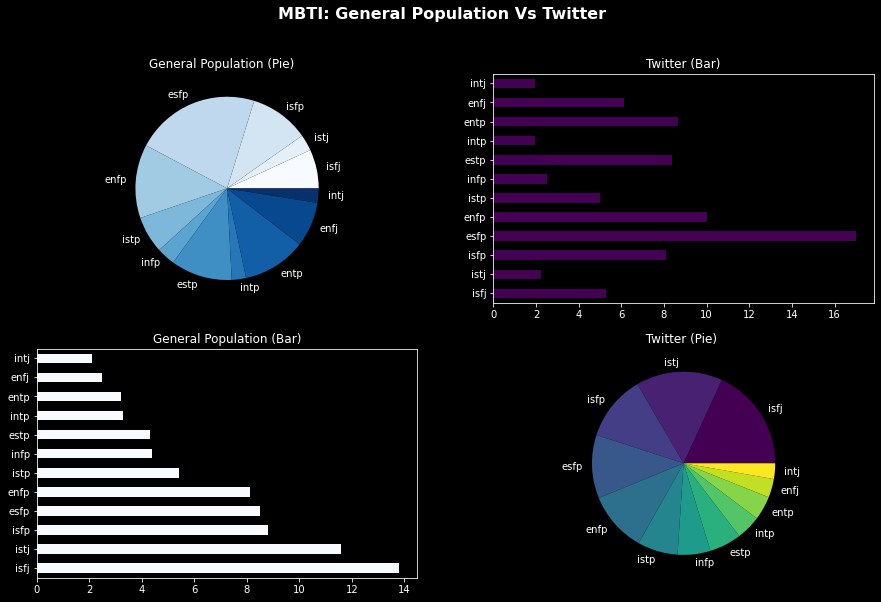

'Summary'

,isfj,istj,isfp,esfp,enfp,istp,infp,estp,intp,entp,enfj,intj
pop percentage,13.8%,11.6%,8.8%,8.5%,8.1%,5.4%,4.4%,4.3%,3.3%,3.2%,2.5%,2.1%
found percent,5.3%,2.2%,8.1%,17.0%,10.0%,5.0%,2.5%,8.4%,1.9%,8.6%,6.1%,1.9%


In [29]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)
m=.75
fig = plt.figure(constrained_layout=False,figsize=(m*20,m*12.361))

gs = GridSpec(2, 2, figure=fig)

# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))



plt.suptitle('MBTI: General Population Vs Twitter',fontsize=16,weight='demibold')





ax1 = fig.add_subplot(gs[0, 0])
kwargs1={'title':'General Population (Pie)   ','ax':ax1,'legend':False,'ylabel':'',   'cmap':'Blues'}

tochart.plot.pie(y='found percent',**kwargs1)



ax2 = fig.add_subplot(gs[1, 1])

kwargs2={'title':'  Twitter (Pie)   ','ax':ax2,'legend':False,'ylabel':'',   'cmap':'viridis'}
tochart.plot.pie(y='pop percentage',**kwargs2)


ax3 = fig.add_subplot(gs[0,1])
kwargs3={'ax':ax3,'legend':False,'title':'Twitter (Bar)',   'cmap':'viridis'}

tochart.plot.barh(y='found percent',**kwargs3)




ax4 = fig.add_subplot(gs[1, 0])
kwargs4={'ax':ax4,'legend':False,'title':'General Population (Bar)',   'cmap':'Blues'}
tochart.plot.barh(y='pop percentage',**kwargs4)

plt.show()




fig.suptitle("GridSpec")
format_axes(fig)

plt.show()




display('Summary',styleddf)